# Zomato Delivery Time Prediction

## Import Libraries

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [832]:
df = pd.read_csv("finalTrain.csv")

In [833]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
1,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30,NaN,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19
2,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,18:25,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25
3,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43


In [834]:
df.shape

(45584, 20)

In [835]:
## We can drop IDs related column as they do not provide any detail for training our model:

df = df.drop(labels = ['ID','Delivery_person_ID'],axis = 1)
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
1,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30,NaN,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19
2,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,18:25,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,15.0,1.0,12.323978,76.627961,12.433978,76.737961,29-03-2022,NaN,22:10,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,30
45580,15.0,1.0,-13.049645,-80.242268,13.129645,80.322268,08-03-2022,NaN,23:05,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,25
45581,15.0,1.0,11.003681,76.975525,11.133681,77.105525,02-04-2022,NaN,23:45,NaN,NaN,3,Meal,scooter,0.0,No,Metropolitian,25
45582,15.0,1.0,0.000000,0.000000,0.070000,0.070000,14-03-2022,NaN,17:40,NaN,NaN,3,Drinks,scooter,0.0,No,Metropolitian,34


In [836]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [837]:
df.isnull().mean()*100

Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

## Colums which has less than 1.5% of missing NA values:

In [838]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.015 and df[var].isnull().mean() > 0]
cols

['Weather_conditions', 'Road_traffic_density', 'Festival']

## Impact on the dataset after removing these null rows from cols

In [839]:
len(df[cols].dropna()) / len(df)

0.9815505440505441

### So overall impact on the dataset will be less than 2%. 

## Now we will check if the values which needs to be removed, will be removed randomly or not:

In [840]:
df[cols].head()

,Weather_conditions,Road_traffic_density,Festival
0,Cloudy,Medium,No
1,NaN,NaN,No
2,NaN,NaN,No
3,Stormy,Low,No
4,Sandstorms,Medium,No


In [841]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((45584, 18), (44743, 3))

In [842]:
new_df.head()

,Weather_conditions,Road_traffic_density,Festival
0,Cloudy,Medium,No
3,Stormy,Low,No
4,Sandstorms,Medium,No
5,Sandstorms,Jam,No
7,Cloudy,Medium,No


In [843]:
new_df['Weather_conditions'].value_counts()

Fog           7642
Stormy        7541
Cloudy        7515
Sandstorms    7463
Windy         7380
Sunny         7202
Name: Weather_conditions, dtype: int64

In [844]:
## Now we will check if the removed values are removed randomly or not:

temp = pd.concat([
            # percentage of observations per category, original data
            df['Weather_conditions'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Weather_conditions'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Fog,16.788786,17.079767
Stormy,16.637417,16.854033
Cloudy,16.525535,16.795923
Sandstorms,16.439979,16.679704
Windy,16.282029,16.494200
Sunny,15.974903,16.096373


In [845]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Road_traffic_density'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Road_traffic_density'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Low,33.950509,34.284693
Jam,31.017462,31.504369
Medium,24.010618,24.368058
High,9.702966,9.842880


In [846]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Festival'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Festival'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
No,97.534223,98.037682
Yes,1.965602,1.962318


### Hence we drop the NA values from those columns as it doesnot affect the distribution

In [847]:
df = df.dropna(subset=cols)

In [848]:
df.shape

(44743, 18)

In [849]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,NaN,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


In [850]:
df.isnull().sum()

Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                           1160
Time_taken (min)                  0
dtype: int64

In [851]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.140683,70.601956,17.469516,70.829817,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.938875,21.680522,7.340693,21.138683,0.816893,0.571901,9.344705
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44743 entries, 0 to 45545
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43421 non-null  float64
 1   Delivery_person_Ratings      43368 non-null  float64
 2   Restaurant_latitude          44743 non-null  float64
 3   Restaurant_longitude         44743 non-null  float64
 4   Delivery_location_latitude   44743 non-null  float64
 5   Delivery_location_longitude  44743 non-null  float64
 6   Order_Date                   44743 non-null  object 
 7   Time_Orderd                  43634 non-null  object 
 8   Time_Order_picked            44743 non-null  object 
 9   Weather_conditions           44743 non-null  object 
 10  Road_traffic_density         44743 non-null  object 
 11  Vehicle_condition            44743 non-null  int64  
 12  Type_of_order                44743 non-null  object 
 13  Type_of_vehicle 

In [853]:
df[df.columns[df.dtypes=='object']].isnull().sum()

Order_Date                 0
Time_Orderd             1109
Time_Order_picked          0
Weather_conditions         0
Road_traffic_density       0
Type_of_order              0
Type_of_vehicle            0
Festival                   0
City                    1160
dtype: int64

In [854]:
df[df.columns[df.dtypes!='object']].isnull().sum()

Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
multiple_deliveries             969
Time_taken (min)                  0
dtype: int64

### we would also like to drop all the rows which has NaN values as they donot provide any information:

In [855]:
df.dropna(how = 'all').shape

(44743, 18)

In [856]:
df.shape

(44743, 18)

## Imputing City column:

In [857]:
df['City'].value_counts()

Metropolitian    33501
Urban             9919
Semi-Urban         163
Name: City, dtype: int64

In [858]:
df[df['Delivery_location_latitude'] == 0].shape

(0, 18)

In [859]:
df[df['Delivery_location_longitude'] == 0].shape

(0, 18)

In [860]:
df[df['Restaurant_longitude'] == 0].shape

(3580, 18)

In [861]:
df[df['Restaurant_latitude'] == 0].shape

(3580, 18)

In [862]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.140683,70.601956,17.469516,70.829817,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.938875,21.680522,7.340693,21.138683,0.816893,0.571901,9.344705
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


## It is to be noted that the latitude and longitude of India ranges from :-
## Latitude: 8 to 37
## Longitude: 68 to 97

## So it is not possible to have a negative value in the locations columns

## Hence we convert all the negative values to positive values

In [863]:
lat_df = df[['Restaurant_latitude','Restaurant_longitude',
                     'Delivery_location_latitude',
                     'Delivery_location_longitude']].applymap(abs)

In [864]:
df.update(lat_df)

C:\Users\deepa\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [865]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,NaN,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


## Lets check the values which are out of range for Delivery_location_latitude and  Delivery_location_longitude

In [866]:
df[df['Delivery_location_latitude'] <= 8 ].shape

(3580, 18)

### 3580 rows have values out of range

In [867]:
filter_data = df[df['Delivery_location_latitude'] >= 8 ]
filter_data.shape

(41163, 18)

In [868]:
filter_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19
8,NaN,NaN,18.551440,73.804855,18.611440,73.864855,05-03-2022,NaN,22:05,Stormy,Jam,2,Meal,scooter,0.0,No,Urban,12


### Now we will also filter out the NaN values in the City column

In [869]:

filter_data_city = filter_data[filter_data["City"].notnull()]


In [870]:
filter_data_city

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19
8,NaN,NaN,18.551440,73.804855,18.611440,73.864855,05-03-2022,NaN,22:05,Stormy,Jam,2,Meal,scooter,0.0,No,Urban,12
9,NaN,NaN,23.353783,85.326967,23.463783,85.436967,04-04-2022,NaN,19:45,Fog,Jam,2,Drinks,scooter,1.0,No,Metropolitian,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45541,20.0,4.8,21.183434,72.814492,21.223434,72.854492,03-03-2022,15:55,16:05,Windy,Medium,2,Drinks,electric_scooter,1.0,No,Urban,25
45542,20.0,4.5,11.022477,76.995667,11.042477,77.015667,09-03-2022,11:50,11:55,Stormy,High,2,Snack,electric_scooter,0.0,No,Metropolitian,21
45543,20.0,4.8,13.005801,80.250744,13.035801,80.280744,17-03-2022,17:55,18:05,Cloudy,Medium,2,Drinks,scooter,1.0,No,Metropolitian,19
45544,20.0,4.9,21.186608,72.794136,21.216608,72.824136,03-03-2022,20:25,20:40,Sandstorms,Jam,2,Drinks,motorcycle,1.0,No,Urban,18


In [871]:
filter_data_city.shape

(40088, 18)

### Now for the missing values in City, we will perform KNN imputation based on the given latitude and longitude values in the filter_data columns


In [872]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import accuracy_score


In [873]:
X = filter_data_city[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]
y = filter_data_city.City

In [874]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=45)

In [875]:
X_train

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
8070,21.157729,72.768726,21.217729,72.828726
21740,11.021278,76.995017,11.081278,77.055017
31065,30.873988,75.842739,30.883988,75.852739
27501,12.297954,76.665169,12.387954,76.755169
18142,26.913483,75.803139,26.933483,75.823139
...,...,...,...,...
36970,18.994049,72.825203,19.054049,72.885203
18730,22.725748,75.898497,22.775748,75.948497
14912,26.849596,75.800512,26.989596,75.940512
7303,19.055831,72.833984,19.065831,72.843984


In [876]:
knn = KNNImputer()

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [877]:
pd.DataFrame(X_train_trf,columns = X_train.columns)

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,21.157729,72.768726,21.217729,72.828726
1,11.021278,76.995017,11.081278,77.055017
2,30.873988,75.842739,30.883988,75.852739
3,12.297954,76.665169,12.387954,76.755169
4,26.913483,75.803139,26.933483,75.823139
...,...,...,...,...
28056,18.994049,72.825203,19.054049,72.885203
28057,22.725748,75.898497,22.775748,75.948497
28058,26.849596,75.800512,26.989596,75.940512
28059,19.055831,72.833984,19.065831,72.843984


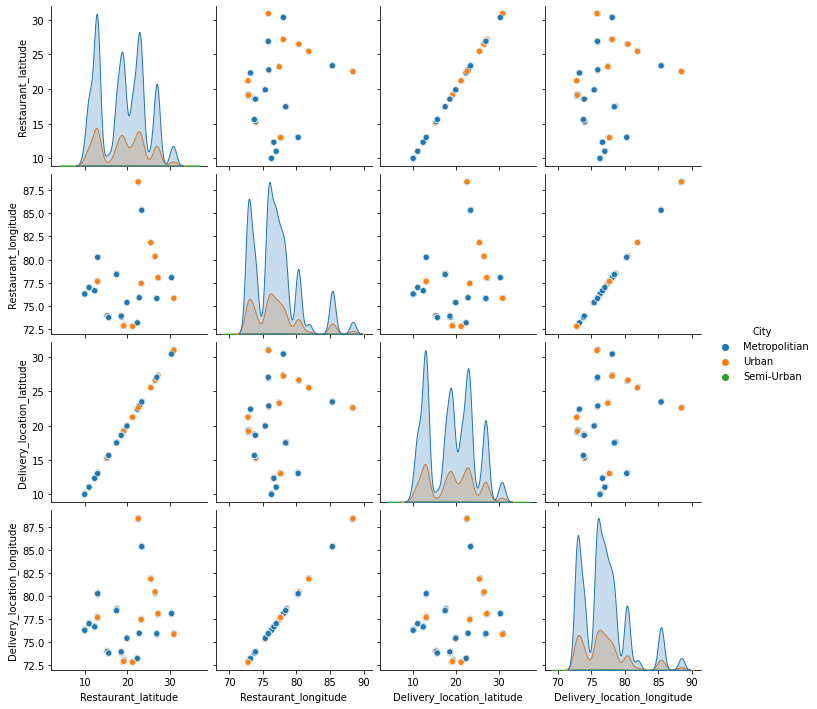

In [683]:
sns.pairplot(filter_data_city[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','City']],hue = 'City')

In [878]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrc = LogisticRegression()


In [879]:
lrc.fit(X_train_trf,y_train)

LogisticRegression()

In [880]:
y_pred = lrc.predict(X_test_trf)

In [881]:
accuracy_score(y_test,y_pred)  ## checking the accuracy of the imputer

0.7650286854577202

In [882]:
confusion_matrix(y_test,y_pred)

array([[9201,    0,    0],
       [  52,    0,    0],
       [2774,    0,    0]], dtype=int64)

In [883]:
cm = confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['Metropolitian','Urban','Semi-Urban'], 
                     columns = ['Metropolitian','Urban','Semi-Urban'])

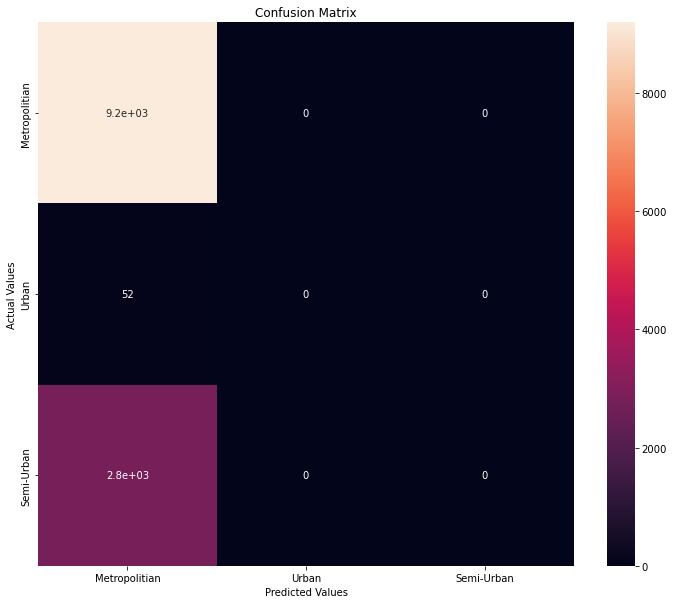

In [884]:
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [885]:
filter_data_null = filter_data[filter_data["City"].isnull()]

In [886]:
X_fil = filter_data_null[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]
y_fil = filter_data_null['City']

In [887]:
X_fil

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
3,18.543626,73.905101,18.573626,73.935101
90,17.412330,78.449654,17.462330,78.499654
124,18.533811,73.899315,18.663811,74.029315
189,19.223840,72.841347,19.333840,72.951347
223,13.026279,80.174568,13.086279,80.234568
...,...,...,...,...
45315,21.160437,72.774209,21.240437,72.854209
45356,21.175975,72.795503,21.255975,72.875503
45395,11.022477,76.995667,11.082477,77.055667
45412,11.008638,76.984311,11.088638,77.064311


In [888]:
X_fil = knn.fit_transform(X_fil)

In [889]:
y_fil_pred = lrc.predict(X_fil)

In [890]:
filter_data_null['City'] = y_fil_pred

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/4212048549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data_null['City'] = y_fil_pred


In [891]:
filter_data_null.City.value_counts()

Metropolitian    1075
Name: City, dtype: int64

In [892]:
filter_data_null.shape

(1075, 18)

In [893]:
filter_data_city.shape

(40088, 18)

In [894]:
imputed_data = pd.concat([filter_data_city,filter_data_null])

In [895]:
imputed_data.shape

(41163, 18)

In [896]:
imputed_data.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19
8,NaN,NaN,18.551440,73.804855,18.611440,73.864855,05-03-2022,NaN,22:05,Stormy,Jam,2,Meal,scooter,0.0,No,Urban,12
9,NaN,NaN,23.353783,85.326967,23.463783,85.436967,04-04-2022,NaN,19:45,Fog,Jam,2,Drinks,scooter,1.0,No,Metropolitian,39


In [897]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,NaN,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,NaN,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


## Now we need to impute the City data where longitude and longitude value are almost 0.

In [898]:

filter_data_nlat = df[df['Delivery_location_latitude'] <= 8 ]
filter_data_nlat.shape

(3580, 18)

## We can perform simple imputation based on most frequest value

In [899]:
df['City'].value_counts()

Metropolitian    33501
Urban             9919
Semi-Urban         163
Name: City, dtype: int64

In [900]:
filter_data_nlat['City'].isnull().sum()

85

In [901]:
simputer = SimpleImputer(strategy='most_frequent')

In [902]:
filter_data_nlat['City'] = simputer.fit_transform(filter_data_nlat[['City']])

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1685023591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data_nlat['City'] = simputer.fit_transform(filter_data_nlat[['City']])


In [903]:
filter_data_nlat['City'].isnull().sum()

0

In [904]:
imputed_data_t = pd.concat([imputed_data,filter_data_nlat])

In [905]:
imputed_data_t.shape

(44743, 18)

In [906]:
df.shape

(44743, 18)

In [907]:
df.update(imputed_data_t)

C:\Users\deepa\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [908]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19
4,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,NaN,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,NaN,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


In [909]:
df.isnull().sum()

Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

## find the outlier in the age category:

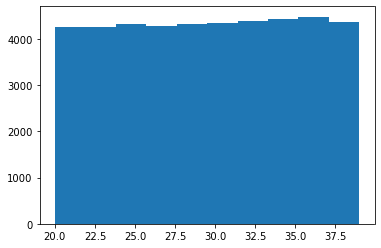

In [910]:
plt.hist(df['Delivery_person_Age'])
plt.show()  ## No outliers in the age category

### Delivery person age is not dependent on any features in this dataset. So we need to perform 
### Simple imputation with stratergy as mean

In [911]:
mimputer = SimpleImputer(strategy= "mean")
df['Delivery_person_Age'] = mimputer.fit_transform(df[['Delivery_person_Age']])

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/2110871499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery_person_Age'] = mimputer.fit_transform(df[['Delivery_person_Age']])


In [912]:
df['Delivery_person_Age'].isnull().sum()

0

In [913]:
df.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,29.576196,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,29.576196,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19
4,29.576196,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,29.576196,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,29.576196,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


### Rounded off to floor value for the age column:

In [914]:
df['Delivery_person_Age'] = np.floor(df['Delivery_person_Age'])

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/3285088731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery_person_Age'] = np.floor(df['Delivery_person_Age'])


In [915]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,29.0,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
3,29.0,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19
4,29.0,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43
5,29.0,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24
7,29.0,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19


In [916]:
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

## There are certain rows with value zero in restaurant latitude and longitude columns:

In [917]:
zero_rows_lat = df[df['Restaurant_latitude'] == 0]

In [918]:
zero_rows_lat.shape

(3580, 18)

In [919]:
df[df['Restaurant_longitude'] == 0].shape

(3580, 18)

In [920]:
df[df['Delivery_location_latitude'] <= 1].shape

(3580, 18)

In [921]:
df[df['Delivery_location_longitude'] <= 1].shape

(3580, 18)

## Lets split the dataset by dropping the values of longitude and latitude which are not in range

In [922]:
lat_df = df.drop(df[df['Restaurant_latitude'] == 0].index)

In [923]:
lat_df.shape

(41163, 18)

## Lets find the correlation between the variables by using heatmap:

In [924]:
lat_df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
Delivery_person_Age,1.000000,-0.117298,0.004773,0.009582,0.004754,0.009554,-0.002401,0.115114,0.294956
Delivery_person_Ratings,-0.117298,1.000000,-0.004548,0.002632,-0.005273,0.001496,0.047946,-0.124817,-0.362226
Restaurant_latitude,0.004773,-0.004548,1.000000,0.004431,0.999977,0.004913,0.002902,0.010797,0.012625
Restaurant_longitude,0.009582,0.002632,0.004431,1.000000,0.004426,0.999945,0.002778,0.009255,0.006360
Delivery_location_latitude,0.004754,-0.005273,0.999977,0.004426,1.000000,0.004978,0.002962,0.011620,0.014771
Delivery_location_longitude,0.009554,0.001496,0.004913,0.999945,0.004978,1.000000,0.002872,0.010546,0.009718
Vehicle_condition,-0.002401,0.047946,0.002902,0.002778,0.002962,0.002872,1.000000,-0.103331,-0.242860
multiple_deliveries,0.115114,-0.124817,0.010797,0.009255,0.011620,0.010546,-0.103331,1.000000,0.384224
Time_taken (min),0.294956,-0.362226,0.012625,0.006360,0.014771,0.009718,-0.242860,0.384224,1.000000


<AxesSubplot:>

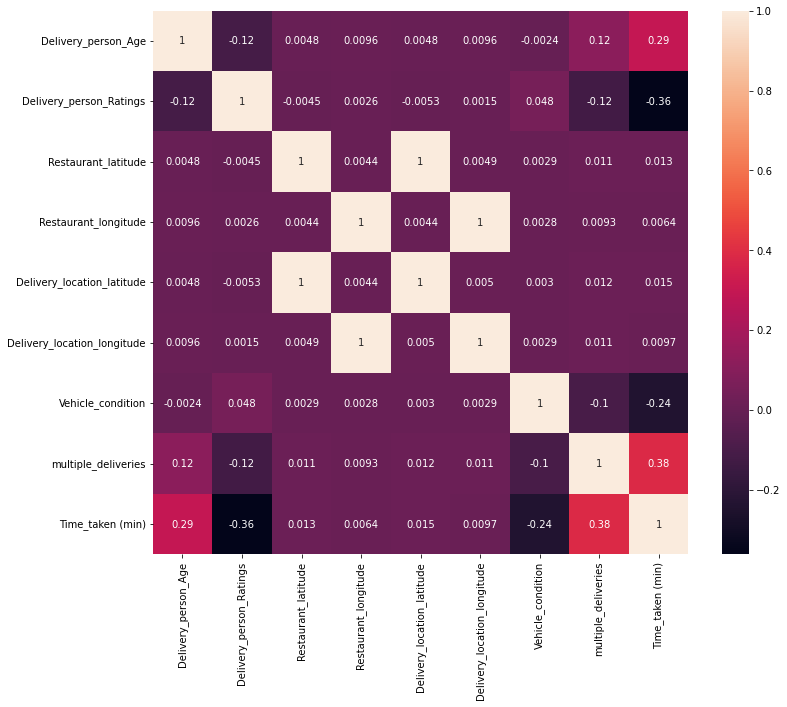

In [925]:
plt.figure(figsize = (12,10))
sns.heatmap(lat_df.corr(),annot = True)

In [926]:
## Inference from Correlation:

# Resaturant_longitude, Resaturant_latitude, Delivery_location_latitude,Delivery_location_longitude are veryless correlated
# to time taken to deliver

## Delivery person rating and vehicle condition are inversly propertional to time taken for delivery

### Delivery person age is directly proportional to time taken for delivery

#### We see a very high correlation between restaurant location and delivery location

##### We see a very high correlation between multiple delivery and time taken

### There is minimal impact of restaurant and delivery location on delivery time

## Important thing is to note that the delivery time is directly proportional to the distance between restaurant and delivery address. We do not have any distance column, instead we have restaurnat latitude,longitude and delivery address latitude,longitude. We can calculate the distance using that

## We use Haversine formula to calculate distance return it in kilometers

In [927]:

import math

def calculate_distance(lat1, lon1, lat2, lon2):
    radius = 6371  # Radius of the earth in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dist = radius * c
    return dist


In [928]:
## Example:

# Coordinates of New York City
lat1, lon1 = 40.7128, -74.0060

# Coordinates of Los Angeles
lat2, lon2 = 34.0522, -118.2437

# Calculate the distance between the two cities
distance = calculate_distance(lat1, lon1, lat2, lon2)

distance

3935.746254609723

## Apply Calculate_distance function to create new column Distance:

In [929]:
lat_df['distance_in_km'] = lat_df.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

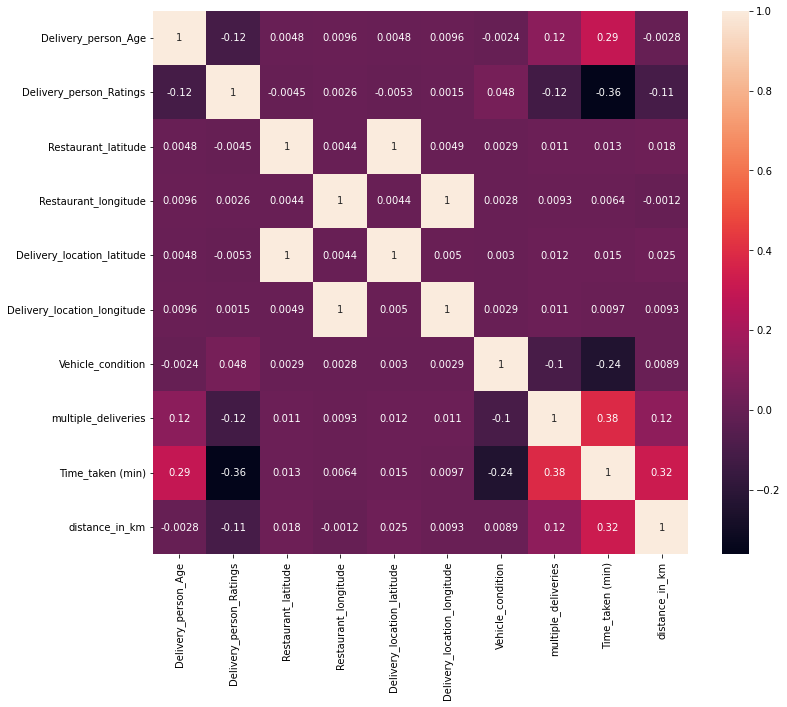

In [930]:
plt.figure(figsize=(12,10))
sns.heatmap(lat_df.corr(),annot = True)
plt.show()

## As expected, we see a very high correlation between time taken for delivery and distance 

### Now we need to get the distance values where restaurant latitude and longitude values are zero.


In [931]:
lat_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,12.236724
3,29.0,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,4.596577
4,29.0,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,10.427236
7,29.0,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19,7.761350
8,29.0,NaN,18.551440,73.804855,18.611440,73.864855,05-03-2022,NaN,22:05,Stormy,Jam,2,Meal,scooter,0.0,No,Urban,12,9.192572


In [932]:
impute_data_lat = pd.concat([lat_df,zero_rows_lat])

In [933]:
impute_data_lat.shape

(44743, 19)

## all the values of distance with values 0 of longitude and latitude are imputed with null.

In [934]:
impute_data_lat[impute_data_lat['Restaurant_latitude'] == 0]




,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
5,29.0,NaN,0.0,0.0,0.07,0.07,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24,NaN
10,29.0,NaN,0.0,0.0,0.03,0.03,05-03-2022,NaN,22:40,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian,26,NaN
13,29.0,NaN,0.0,0.0,0.07,0.07,10-03-2022,NaN,17:55,Sunny,Medium,0,Snack,motorcycle,0.0,No,Urban,17,NaN
46,29.0,NaN,0.0,0.0,0.05,0.05,13-03-2022,NaN,19:25,Cloudy,Jam,0,Drinks,motorcycle,0.0,No,Metropolitian,26,NaN
51,29.0,NaN,0.0,0.0,0.01,0.01,28-03-2022,09:40,09:55,Sunny,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45517,20.0,4.8,0.0,0.0,0.03,0.03,05-03-2022,18:20,18:25,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,NaN
45519,20.0,4.7,0.0,0.0,0.13,0.13,10-03-2022,20:50,0.875,Stormy,Jam,1,Drinks,motorcycle,1.0,No,Metropolitian,18,NaN
45527,20.0,4.7,0.0,0.0,0.11,0.11,06-04-2022,18:20,18:35,Sandstorms,Medium,1,Snack,scooter,1.0,No,Urban,21,NaN
45530,20.0,4.6,0.0,0.0,0.07,0.07,12-02-2022,20:45,0.875,Windy,Jam,0,Buffet,motorcycle,0.0,No,Metropolitian,38,NaN


## We can perform simple imputation with stratergy as mean for imputing distance column

In [935]:
impute_data_lat['distance_in_km'] = mimputer.fit_transform(impute_data_lat[['distance_in_km']])

In [936]:
impute_data_lat[impute_data_lat['Restaurant_latitude'] == 0]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
5,29.0,NaN,0.0,0.0,0.07,0.07,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24,9.730844
10,29.0,NaN,0.0,0.0,0.03,0.03,05-03-2022,NaN,22:40,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian,26,9.730844
13,29.0,NaN,0.0,0.0,0.07,0.07,10-03-2022,NaN,17:55,Sunny,Medium,0,Snack,motorcycle,0.0,No,Urban,17,9.730844
46,29.0,NaN,0.0,0.0,0.05,0.05,13-03-2022,NaN,19:25,Cloudy,Jam,0,Drinks,motorcycle,0.0,No,Metropolitian,26,9.730844
51,29.0,NaN,0.0,0.0,0.01,0.01,28-03-2022,09:40,09:55,Sunny,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,19,9.730844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45517,20.0,4.8,0.0,0.0,0.03,0.03,05-03-2022,18:20,18:25,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,9.730844
45519,20.0,4.7,0.0,0.0,0.13,0.13,10-03-2022,20:50,0.875,Stormy,Jam,1,Drinks,motorcycle,1.0,No,Metropolitian,18,9.730844
45527,20.0,4.7,0.0,0.0,0.11,0.11,06-04-2022,18:20,18:35,Sandstorms,Medium,1,Snack,scooter,1.0,No,Urban,21,9.730844
45530,20.0,4.6,0.0,0.0,0.07,0.07,12-02-2022,20:45,0.875,Windy,Jam,0,Buffet,motorcycle,0.0,No,Metropolitian,38,9.730844


### Now we join the distance column to df dataset

In [937]:
df1 = df.join(impute_data_lat['distance_in_km'])

In [938]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,12.236724
3,29.0,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,4.596577
4,29.0,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,10.427236
5,29.0,NaN,0.000000,0.000000,0.070000,0.070000,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24,9.730844
7,29.0,NaN,13.054347,80.257221,13.104347,80.307221,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19,7.761350


In [939]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km
Delivery_person_Age,1.000000,-0.116696,0.002559,0.000455,0.002544,0.000450,-0.000456,0.114480,0.295711,-0.002707
Delivery_person_Ratings,-0.116696,1.000000,-0.013014,-0.013555,-0.013551,-0.013742,0.048319,-0.125823,-0.360602,-0.104138
Restaurant_latitude,0.002559,-0.013014,1.000000,0.691021,0.999988,0.691075,-0.000172,0.009900,0.014189,0.013010
Restaurant_longitude,0.000455,-0.013555,0.691021,1.000000,0.690913,0.999998,-0.002627,0.004939,0.008786,-0.000195
Delivery_location_latitude,0.002544,-0.013551,0.999988,0.690913,1.000000,0.690976,-0.000131,0.010527,0.015791,0.017807
Delivery_location_longitude,0.000450,-0.013742,0.691075,0.999998,0.690976,1.000000,-0.002613,0.005158,0.009343,0.001471
Vehicle_condition,-0.000456,0.048319,-0.000172,-0.002627,-0.000131,-0.002613,1.000000,-0.101271,-0.243058,0.008499
multiple_deliveries,0.114480,-0.125823,0.009900,0.004939,0.010527,0.005158,-0.101271,1.000000,0.384710,0.117764
Time_taken (min),0.295711,-0.360602,0.014189,0.008786,0.015791,0.009343,-0.243058,0.384710,1.000000,0.307049
distance_in_km,-0.002707,-0.104138,0.013010,-0.000195,0.017807,0.001471,0.008499,0.117764,0.307049,1.000000


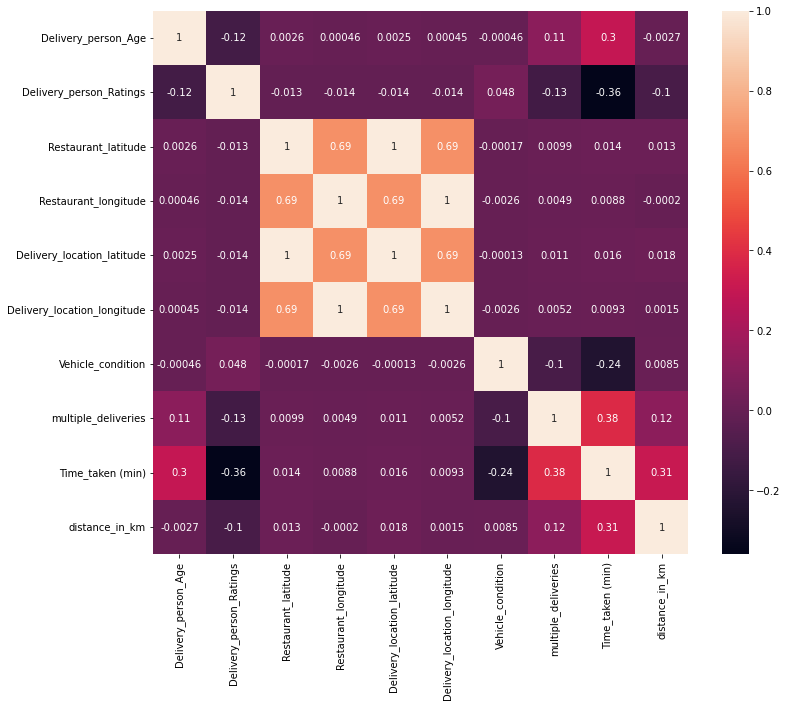

In [940]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot = True)
plt.show()

### As we have succesfully performed feature engineering by creating distnace column, now there is no need for latitude and longitude . Hence we can drop these 4 columns

In [941]:
df1 = df1.drop(labels= ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis =1)

In [942]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,12.236724
3,29.0,NaN,09-03-2022,NaN,23:40,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,4.596577
4,29.0,NaN,12-03-2022,NaN,17:50,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,10.427236
5,29.0,NaN,02-03-2022,NaN,20:50,Sandstorms,Jam,1,Snack,scooter,0.0,No,Metropolitian,24,9.730844
7,29.0,NaN,15-03-2022,18:35,18:40,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,19,7.761350


In [943]:
df1.isnull().sum()

Delivery_person_Age           0
Delivery_person_Ratings    1375
Order_Date                    0
Time_Orderd                1109
Time_Order_picked             0
Weather_conditions            0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         969
Festival                      0
City                          0
Time_taken (min)              0
distance_in_km                0
dtype: int64

## Now we need to calculate the food preparation time:
## In order to do that, we need to find the difference between Time_Order_picked and Time_Orderd

## The columns data type are in object. We need to convert it in date time format

In [944]:
df1[['Time_Orderd','Time_Order_picked']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44743 entries, 0 to 45545
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time_Orderd        43634 non-null  object
 1   Time_Order_picked  44743 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [945]:
df1['Time_Orderd'].unique()

array([nan, '18:35', '20:25', '17:30', '09:40', '11:10', '23:45',
       '0.916666667', '09:20', '08:35', '21:50', '22:35', '09:30',
       '08:55', '21:40', '18:45', '16:40', '20:45', '19:25', '14:10',
       '17:20', '22:40', '22:55', '22:45', '23:25', '11:20', '10:45',
       '21:35', '18:15', '13:40', '23:50', '10:30', '21:30', '20:20',
       '10:20', '18:40', '13:55', '21:15', '15:25', '20:35', '20:15',
       '11:35', '23:15', '20:55', '17:35', '08:25', '17:45', '09:15', '1',
       '14:45', '17:50', '08:15', '19:55', '19:35', '10:10', '21:10',
       '13:30', '0.958333333', '20:50', '0.875', '09:10', '23:40',
       '11:25', '19:30', '20:30', '08:30', '12:20', '14:30', '22:50',
       '14:55', '21:45', '17:55', '19:45', '11:45', '21:20', '16:50',
       '17:40', '09:50', '14:20', '11:50', '22:20', '18:55', '22:25',
       '12:35', '0.458333333', '21:25', '22:15', '19:40', '14:25',
       '10:55', '0.75', '09:45', '20:10', '19:15', '17:10', '12:50',
       '0.833333333', '13:10'

In [946]:
df1['Time_Order_picked'].unique()

array(['18:35', '23:40', '17:50', '20:50', '18:40', '22:05', '19:45',
       '22:40', '23:05', '17:55', '22:35', '18:10', '12:10', '0.5',
       '11:05', '20:30', '18:30', '10:50', '21:05', '20:20', '21:45',
       '17:35', '18:15', '10:10', '19:25', '0.791666667', '09:55',
       '24:05:00', '19:55', '11:15', '22:45', '21:30', '15:25', '18:25',
       '19:20', '08:35', '13:55', '15:15', '23:55', '23:30', '19:05',
       '18:55', '19:30', '22:55', '20:45', '22:10', '09:35', '18:20',
       '22:20', '09:20', '23:20', '08:25', '23:35', '23:50', '22:30',
       '20:10', '08:40', '22:25', '17:30', '21:55', '0.375', '23:25',
       '22:50', '16:55', '14:40', '11:25', '12:30', '21:25', '15:05',
       '21:15', '17:25', '23:45', '20:05', '19:40', '21:50', '0.75',
       '15:30', '1', '18:50', '18:45', '12:05', '12:35', '0.458333333',
       '0.833333333', '0.875', '0.416666667', '21:35', '22:15', '18:05',
       '14:30', '16:05', '20:35', '17:20', '21:40', '09:40', '15:50',
       '24:15:00',

## It is quite visible that lot of values are not in the format "HH:MM".
## These values has been captured as general values and need to be converted into proper date format

## First we need to filter these values


In [947]:
df_not_top_mask = ~df1['Time_Order_picked'].str.contains(":",regex = True)

In [948]:
df_not_top = df1[df_not_top_mask]

In [949]:
df_not_top.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
22,29.0,NaN,15-03-2022,NaN,0.5,Cloudy,High,0,Snack,motorcycle,0.0,No,Urban,29,1.554527
50,29.0,NaN,27-03-2022,NaN,0.791666667,Stormy,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,30,19.886445
62,29.0,NaN,01-04-2022,NaN,0.5,Fog,High,1,Drinks,scooter,1.0,No,Urban,26,3.060556
138,29.0,NaN,09-03-2022,NaN,0.375,Sandstorms,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,1.558084
171,29.0,NaN,27-03-2022,NaN,0.791666667,Windy,Medium,2,Meal,scooter,1.0,No,Metropolitian,23,13.990192


### Now we need to convert these string values to float

In [950]:
df_not_top['Time_Order_picked'] = df_not_top['Time_Order_picked'].astype(float)

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1595900734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_top['Time_Order_picked'] = df_not_top['Time_Order_picked'].astype(float)


In [951]:
df_not_top['Time_Order_picked'].dtype

dtype('float64')

In [952]:
df_not_top['Time_Order_picked'].unique()

array([0.5       , 0.79166667, 0.375     , 0.75      , 1.        ,
       0.45833333, 0.83333333, 0.875     , 0.41666667, 0.91666667,
       0.66666667, 0.58333333, 0.54166667, 0.95833333, 0.625     ,
       0.70833333])

### The values are ranging from 0 to 1.This is in a general format. We need to convert the range to 0 to 24:

In [953]:
def convert_time(x):
    hours, minutes = divmod(int(x * 1440), 60)
    return f"{hours:02d}:{minutes:02d}"

# apply function to the column
df_not_top['Time_Order_picked'] = df_not_top['Time_Order_picked'].apply(convert_time)

df_not_top['Time_Order_picked']

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/4182705295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_top['Time_Order_picked'] = df_not_top['Time_Order_picked'].apply(convert_time)


22       12:00
50       19:00
62       12:00
138      09:00
171      19:00
         ...  
45511    24:00
45512    13:59
45519    21:00
45530    21:00
45532    09:00
Name: Time_Order_picked, Length: 4069, dtype: object

In [954]:
df_not_top['Time_Order_picked'].unique()

array(['12:00', '19:00', '09:00', '18:00', '24:00', '10:59', '19:59',
       '21:00', '10:00', '22:00', '16:00', '13:59', '13:00', '22:59',
       '15:00', '16:59'], dtype=object)

In [955]:
df_not_top.shape

(4069, 15)

In [956]:
df1.update(df_not_top)

In [957]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,06-04-2022,NaN,18:35,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724
3,29.0,NaN,09-03-2022,NaN,23:40,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577
4,29.0,NaN,12-03-2022,NaN,17:50,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236
5,29.0,NaN,02-03-2022,NaN,20:50,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844
7,29.0,NaN,15-03-2022,18:35,18:40,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350


In [958]:
df_top_mask = df1['Time_Order_picked'].str.contains(":",regex = True)

In [959]:
df_top = df1[df_top_mask]

In [960]:
df_top.shape

(44743, 15)

In [961]:
df1['Time_Order_picked'].unique()

array(['18:35', '23:40', '17:50', '20:50', '18:40', '22:05', '19:45',
       '22:40', '23:05', '17:55', '22:35', '18:10', '12:10', '12:00',
       '11:05', '20:30', '18:30', '10:50', '21:05', '20:20', '21:45',
       '17:35', '18:15', '10:10', '19:25', '19:00', '09:55', '24:05:00',
       '19:55', '11:15', '22:45', '21:30', '15:25', '18:25', '19:20',
       '08:35', '13:55', '15:15', '23:55', '23:30', '19:05', '18:55',
       '19:30', '22:55', '20:45', '22:10', '09:35', '18:20', '22:20',
       '09:20', '23:20', '08:25', '23:35', '23:50', '22:30', '20:10',
       '08:40', '22:25', '17:30', '21:55', '09:00', '23:25', '22:50',
       '16:55', '14:40', '11:25', '12:30', '21:25', '15:05', '21:15',
       '17:25', '23:45', '20:05', '19:40', '21:50', '18:00', '15:30',
       '24:00', '18:50', '18:45', '12:05', '12:35', '10:59', '19:59',
       '21:00', '10:00', '21:35', '22:15', '18:05', '14:30', '16:05',
       '20:35', '17:20', '21:40', '09:40', '15:50', '24:15:00', '14:25',
       '23:15'

### Now we will filter out the values which are in format: 24 : mm: ss

In [962]:
df_24_top_mask = df1['Time_Order_picked'].str.contains("24:[0-5][0-9]:[0-5][0-9]", regex=True)

In [963]:
df_24_top = df1[df_24_top_mask]

In [964]:
df_24_top.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
53,29.0,NaN,17-02-2022,NaN,24:05:00,Stormy,Low,0.0,Drinks,motorcycle,0.0,No,Metropolitian,27.0,4.406511
127,29.0,NaN,16-02-2022,NaN,24:05:00,Stormy,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,28.0,13.735729
246,29.0,NaN,17-03-2022,NaN,24:15:00,Fog,Low,1.0,Drinks,scooter,1.0,No,Metropolitian,18.0,4.656607
281,29.0,NaN,18-03-2022,NaN,24:15:00,Sandstorms,Low,1.0,Drinks,motorcycle,1.0,No,Metropolitian,21.0,10.906471
392,29.0,NaN,18-03-2022,NaN,24:10:00,Sandstorms,Low,1.0,Buffet,scooter,1.0,No,Metropolitian,13.0,9.730844


In [965]:
df_24_top['Time_Order_picked'] = df_24_top['Time_Order_picked'].str.replace(':00', '')

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/3003921181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_top['Time_Order_picked'] = df_24_top['Time_Order_picked'].str.replace(':00', '')


In [966]:
df_24_top['Time_Order_picked']

53       24:05
127      24:05
246      24:15
281      24:15
392      24:10
         ...  
45124    24:05
45142    24:05
45190    24:10
45252    24:15
45303    24:05
Name: Time_Order_picked, Length: 858, dtype: object

In [967]:
df1.update(df_24_top['Time_Order_picked'])

In [968]:
df1['Time_Order_picked'].shape

(44743,)

In [969]:
df1['Time_Order_picked'] = df1['Time_Order_picked'].str.replace('24:', '00:')

In [970]:
df1['Time_Order_picked'].unique()

array(['18:35', '23:40', '17:50', '20:50', '18:40', '22:05', '19:45',
       '22:40', '23:05', '17:55', '22:35', '18:10', '12:10', '12:00',
       '11:05', '20:30', '18:30', '10:50', '21:05', '20:20', '21:45',
       '17:35', '18:15', '10:10', '19:25', '19:00', '09:55', '00:05',
       '19:55', '11:15', '22:45', '21:30', '15:25', '18:25', '19:20',
       '08:35', '13:55', '15:15', '23:55', '23:30', '19:05', '18:55',
       '19:30', '22:55', '20:45', '22:10', '09:35', '18:20', '22:20',
       '09:20', '23:20', '08:25', '23:35', '23:50', '22:30', '20:10',
       '08:40', '22:25', '17:30', '21:55', '09:00', '23:25', '22:50',
       '16:55', '14:40', '11:25', '12:30', '21:25', '15:05', '21:15',
       '17:25', '23:45', '20:05', '19:40', '21:50', '18:00', '15:30',
       '00:00', '18:50', '18:45', '12:05', '12:35', '10:59', '19:59',
       '21:00', '10:00', '21:35', '22:15', '18:05', '14:30', '16:05',
       '20:35', '17:20', '21:40', '09:40', '15:50', '00:15', '14:25',
       '23:15', '22:

In [971]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,06-04-2022,NaN,18:35,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724
3,29.0,NaN,09-03-2022,NaN,23:40,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577
4,29.0,NaN,12-03-2022,NaN,17:50,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236
5,29.0,NaN,02-03-2022,NaN,20:50,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844
7,29.0,NaN,15-03-2022,18:35,18:40,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350


### Now convert the order date to datetime format:

In [972]:
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], format='%d-%m-%Y')

In [973]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44743 entries, 0 to 45545
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_Age      44743 non-null  float64       
 1   Delivery_person_Ratings  43368 non-null  float64       
 2   Order_Date               44743 non-null  datetime64[ns]
 3   Time_Orderd              43634 non-null  object        
 4   Time_Order_picked        44743 non-null  object        
 5   Weather_conditions       44743 non-null  object        
 6   Road_traffic_density     44743 non-null  object        
 7   Vehicle_condition        44743 non-null  float64       
 8   Type_of_order            44743 non-null  object        
 9   Type_of_vehicle          44743 non-null  object        
 10  multiple_deliveries      43774 non-null  float64       
 11  Festival                 44743 non-null  object        
 12  City                     44743 n

In [974]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,NaN,2022-04-06,NaN,18:35,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724
3,29.0,NaN,2022-03-09,NaN,23:40,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577
4,29.0,NaN,2022-03-12,NaN,17:50,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236
5,29.0,NaN,2022-03-02,NaN,20:50,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844
7,29.0,NaN,2022-03-15,18:35,18:40,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350


## Now lets add the Order date to the Time_Order_picked:

In [975]:
df1['Time_Order_picked'] = df1["Order_Date"].astype(str) + " " + df1['Time_Order_picked']

In [976]:
df1['Time_Order_picked']

0        2022-04-06 18:35
3        2022-03-09 23:40
4        2022-03-12 17:50
5        2022-03-02 20:50
7        2022-03-15 18:40
               ...       
45541    2022-03-03 16:05
45542    2022-03-09 11:55
45543    2022-03-17 18:05
45544    2022-03-03 20:40
45545    2022-03-07 13:40
Name: Time_Order_picked, Length: 44743, dtype: object

In [977]:
df1['Time_Order_picked'] = pd.to_datetime(df1['Time_Order_picked'], format = "%Y-%m-%d %H:%M")

In [978]:
df1['Time_Order_picked'].head()

0   2022-04-06 18:35:00
3   2022-03-09 23:40:00
4   2022-03-12 17:50:00
5   2022-03-02 20:50:00
7   2022-03-15 18:40:00
Name: Time_Order_picked, dtype: datetime64[ns]

## Handling Time_ordered column:

In [979]:
df1["Time_Orderd"].unique()

array([nan, '18:35', '20:25', '17:30', '09:40', '11:10', '23:45',
       '0.916666667', '09:20', '08:35', '21:50', '22:35', '09:30',
       '08:55', '21:40', '18:45', '16:40', '20:45', '19:25', '14:10',
       '17:20', '22:40', '22:55', '22:45', '23:25', '11:20', '10:45',
       '21:35', '18:15', '13:40', '23:50', '10:30', '21:30', '20:20',
       '10:20', '18:40', '13:55', '21:15', '15:25', '20:35', '20:15',
       '11:35', '23:15', '20:55', '17:35', '08:25', '17:45', '09:15', '1',
       '14:45', '17:50', '08:15', '19:55', '19:35', '10:10', '21:10',
       '13:30', '0.958333333', '20:50', '0.875', '09:10', '23:40',
       '11:25', '19:30', '20:30', '08:30', '12:20', '14:30', '22:50',
       '14:55', '21:45', '17:55', '19:45', '11:45', '21:20', '16:50',
       '17:40', '09:50', '14:20', '11:50', '22:20', '18:55', '22:25',
       '12:35', '0.458333333', '21:25', '22:15', '19:40', '14:25',
       '10:55', '0.75', '09:45', '20:10', '19:15', '17:10', '12:50',
       '0.833333333', '13:10'

## Lets filter the NaN values first:

In [1020]:
df1_to = df1[df1["Time_Orderd"].notnull()]

In [1021]:
df1_to.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
7,29.0,NaN,2022-03-15,18:35,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350
26,29.0,NaN,2022-04-05,20:25,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902
41,29.0,NaN,2022-03-12,17:30,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699
51,29.0,NaN,2022-03-28,09:40,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844
59,29.0,NaN,2022-03-21,11:10,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032


In [1022]:
df1_not_op_mask = ~df1_to['Time_Orderd'].str.contains(":",regex = True)

In [1023]:
df1_not_op = df1_to[df1_not_op_mask]

In [1024]:
df1_not_op

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
109,29.0,NaN,2022-03-23,0.916666667,2022-03-23 22:10:00,Stormy,Jam,2.0,Snack,scooter,1.0,No,Urban,35.0,12.237168
490,29.0,NaN,2022-03-08,0.916666667,2022-03-08 22:05:00,Fog,Jam,1.0,Buffet,scooter,0.0,No,Metropolitian,40.0,10.428103
552,29.0,NaN,2022-03-20,1,2022-03-20 00:10:00,Cloudy,Low,1.0,Buffet,scooter,1.0,No,Metropolitian,35.0,19.880041
673,29.0,NaN,2022-04-06,0.958333333,2022-04-06 23:15:00,Sandstorms,Low,2.0,Buffet,electric_scooter,1.0,No,Metropolitian,18.0,9.730844
751,29.0,NaN,2022-03-20,0.875,2022-03-20 21:15:00,Cloudy,Jam,2.0,Drinks,scooter,2.0,No,Metropolitian,36.0,12.162428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45504,20.0,4.6,2022-03-30,0.958333333,2022-03-30 23:15:00,Cloudy,Low,1.0,Buffet,motorcycle,0.0,No,Urban,10.0,7.562982
45531,20.0,4.8,2022-03-19,0.875,2022-03-19 21:05:00,Fog,Jam,1.0,Buffet,scooter,1.0,No,Metropolitian,30.0,7.660957
45533,20.0,4.7,2022-03-26,0.5,2022-03-26 12:15:00,Cloudy,High,0.0,Meal,motorcycle,1.0,No,Metropolitian,20.0,3.116254
45534,20.0,4.7,2022-03-11,0.958333333,2022-03-11 23:15:00,Cloudy,Low,2.0,Buffet,scooter,0.0,No,Urban,10.0,7.762634


In [1025]:
## Convert the dtype to float:

df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].astype(float)

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/2136522022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].astype(float)


In [1026]:
def convert_time(x):
    hours, minutes = divmod(int(x * 1440), 60)
    return f"{hours:02d}:{minutes:02d}"

# apply function to the column
df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].apply(convert_time)

df1_not_op['Time_Orderd']

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/3356183135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].apply(convert_time)


109      22:00
490      22:00
552      24:00
673      22:59
751      21:00
         ...  
45504    22:59
45531    21:00
45533    12:00
45534    22:59
45540    22:00
Name: Time_Orderd, Length: 4043, dtype: object

In [1027]:
## Now we need repalce 24 with 00 in the string value

df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].str.replace('24:', '00:')

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1028997797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_not_op['Time_Orderd'] = df1_not_op['Time_Orderd'].str.replace('24:', '00:')


In [1028]:
df1_not_op['Time_Orderd']

109      22:00
490      22:00
552      00:00
673      22:59
751      21:00
         ...  
45504    22:59
45531    21:00
45533    12:00
45534    22:59
45540    22:00
Name: Time_Orderd, Length: 4043, dtype: object

In [1029]:
df1_to.update(df1_not_op)

C:\Users\deepa\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [1030]:
df1_to['Time_Orderd'].unique()

array(['18:35', '20:25', '17:30', '09:40', '11:10', '23:45', '22:00',
       '09:20', '08:35', '21:50', '22:35', '09:30', '08:55', '21:40',
       '18:45', '16:40', '20:45', '19:25', '14:10', '17:20', '22:40',
       '22:55', '22:45', '23:25', '11:20', '10:45', '21:35', '18:15',
       '13:40', '23:50', '10:30', '21:30', '20:20', '10:20', '18:40',
       '13:55', '21:15', '15:25', '20:35', '20:15', '11:35', '23:15',
       '20:55', '17:35', '08:25', '17:45', '09:15', '00:00', '14:45',
       '17:50', '08:15', '19:55', '19:35', '10:10', '21:10', '13:30',
       '22:59', '20:50', '21:00', '09:10', '23:40', '11:25', '19:30',
       '20:30', '08:30', '12:20', '14:30', '22:50', '14:55', '21:45',
       '17:55', '19:45', '11:45', '21:20', '16:50', '17:40', '09:50',
       '14:20', '11:50', '22:20', '18:55', '22:25', '12:35', '10:59',
       '21:25', '22:15', '19:40', '14:25', '10:55', '18:00', '09:45',
       '20:10', '19:15', '17:10', '12:50', '19:59', '13:10', '20:40',
       '13:50', '08:

In [1031]:
df1_to.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
7,29.0,NaN,2022-03-15,18:35,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350
26,29.0,NaN,2022-04-05,20:25,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902
41,29.0,NaN,2022-03-12,17:30,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699
51,29.0,NaN,2022-03-28,09:40,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844
59,29.0,NaN,2022-03-21,11:10,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032


In [1032]:
df1_to['Time_Orderd'] = df1_to['Order_Date'].astype(str) + " " + df1_to['Time_Orderd']

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/2984122703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to['Time_Orderd'] = df1_to['Order_Date'].astype(str) + " " + df1_to['Time_Orderd']


In [1033]:
df1_to.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
7,29.0,NaN,2022-03-15,2022-03-15 18:35,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350
26,29.0,NaN,2022-04-05,2022-04-05 20:25,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902
41,29.0,NaN,2022-03-12,2022-03-12 17:30,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699
51,29.0,NaN,2022-03-28,2022-03-28 09:40,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844
59,29.0,NaN,2022-03-21,2022-03-21 11:10,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032


In [1034]:
## Now convert the Time_ordered column to datetime format:

df1_to['Time_Orderd'] = pd.to_datetime(df1_to['Time_Orderd'], format="%Y-%m-%d %H:%M")

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1965056838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to['Time_Orderd'] = pd.to_datetime(df1_to['Time_Orderd'], format="%Y-%m-%d %H:%M")


In [1035]:
df1_to.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43634 entries, 7 to 45545
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_Age      43634 non-null  float64       
 1   Delivery_person_Ratings  43368 non-null  float64       
 2   Order_Date               43634 non-null  datetime64[ns]
 3   Time_Orderd              43634 non-null  datetime64[ns]
 4   Time_Order_picked        43634 non-null  datetime64[ns]
 5   Weather_conditions       43634 non-null  object        
 6   Road_traffic_density     43634 non-null  object        
 7   Vehicle_condition        43634 non-null  float64       
 8   Type_of_order            43634 non-null  object        
 9   Type_of_vehicle          43634 non-null  object        
 10  multiple_deliveries      42701 non-null  float64       
 11  Festival                 43634 non-null  object        
 12  City                     43634 n

In [1036]:
df1_to.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
7,29.0,NaN,2022-03-15,2022-03-15 18:35:00,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350
26,29.0,NaN,2022-04-05,2022-04-05 20:25:00,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902
41,29.0,NaN,2022-03-12,2022-03-12 17:30:00,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699
51,29.0,NaN,2022-03-28,2022-03-28 09:40:00,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844
59,29.0,NaN,2022-03-21,2022-03-21 11:10:00,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032


## Now we need to find the difference between the Time_Orderd and Time_Order_picked.


In [1037]:

df1_to['preparation_time_min'] = df1_to['Time_Order_picked'] - df1_to['Time_Orderd']

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/3516884266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to['preparation_time_min'] = df1_to['Time_Order_picked'] - df1_to['Time_Orderd']


In [1038]:
df1_to.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,preparation_time_min
7,29.0,NaN,2022-03-15,2022-03-15 18:35:00,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,0 days 00:05:00
26,29.0,NaN,2022-04-05,2022-04-05 20:25:00,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902,0 days 00:05:00
41,29.0,NaN,2022-03-12,2022-03-12 17:30:00,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699,0 days 00:05:00
51,29.0,NaN,2022-03-28,2022-03-28 09:40:00,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844,0 days 00:15:00
59,29.0,NaN,2022-03-21,2022-03-21 11:10:00,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032,0 days 00:05:00


In [1039]:
df1_to['preparation_time_min'].unique()

array([   300000000000,    900000000000,    600000000000, -85500000000000,
          240000000000,    960000000000,    360000000000,    660000000000,
          840000000000,    540000000000, -86100000000000, -85800000000000],
      dtype='timedelta64[ns]')

### Now you will notice we are getting negative values in preparation_time_min column. 
### That is because the order date is on one day and the order pick up date is in another day.
### So we need to add 1 day to the order pick up date column in order to resolve this issue


## First we need to filter the negative columns

In [1040]:
df1_to_1 = df1_to[df1_to['preparation_time_min'] <= pd.Timedelta(0)]

In [1041]:
df1_to_1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,preparation_time_min
408,29.0,NaN,2022-03-26,2022-03-26 23:50:00,2022-03-26 00:05:00,Cloudy,Low,2.0,Meal,motorcycle,0.0,No,Metropolitian,16.0,8.937880,-1 days +00:15:00
1633,29.0,NaN,2022-03-10,2022-03-10 23:50:00,2022-03-10 00:05:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,20.0,10.707286,-1 days +00:15:00
1837,29.0,NaN,2022-03-06,2022-03-06 23:45:00,2022-03-06 00:00:00,Windy,Low,0.0,Snack,motorcycle,0.0,No,Metropolitian,17.0,20.181187,-1 days +00:15:00
2003,39.0,3.8,2022-02-14,2022-02-14 23:55:00,2022-02-14 00:00:00,Cloudy,Low,1.0,Snack,motorcycle,1.0,No,Metropolitian,32.0,19.839354,-1 days +00:05:00
2105,39.0,4.9,2022-02-18,2022-02-18 23:50:00,2022-02-18 00:00:00,Windy,Low,0.0,Snack,motorcycle,1.0,No,Metropolitian,21.0,10.683790,-1 days +00:10:00


In [1042]:
## Now lets add 1 day to the Time_Order_picked column

from datetime import timedelta

df1_to_1["Time_Order_picked"]+= timedelta(days=1)

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/2771949465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to_1["Time_Order_picked"]+= timedelta(days=1)


In [1043]:
df1_to_1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,preparation_time_min
408,29.0,NaN,2022-03-26,2022-03-26 23:50:00,2022-03-27 00:05:00,Cloudy,Low,2.0,Meal,motorcycle,0.0,No,Metropolitian,16.0,8.937880,-1 days +00:15:00
1633,29.0,NaN,2022-03-10,2022-03-10 23:50:00,2022-03-11 00:05:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,20.0,10.707286,-1 days +00:15:00
1837,29.0,NaN,2022-03-06,2022-03-06 23:45:00,2022-03-07 00:00:00,Windy,Low,0.0,Snack,motorcycle,0.0,No,Metropolitian,17.0,20.181187,-1 days +00:15:00
2003,39.0,3.8,2022-02-14,2022-02-14 23:55:00,2022-02-15 00:00:00,Cloudy,Low,1.0,Snack,motorcycle,1.0,No,Metropolitian,32.0,19.839354,-1 days +00:05:00
2105,39.0,4.9,2022-02-18,2022-02-18 23:50:00,2022-02-19 00:00:00,Windy,Low,0.0,Snack,motorcycle,1.0,No,Metropolitian,21.0,10.683790,-1 days +00:10:00


In [1044]:
## Now lets update the preparation_time_min column with the correct values:

df1_to.update(df1_to_1)

df1_to['preparation_time_min'] = df1_to['Time_Order_picked'] - df1_to['Time_Orderd']

C:\Users\deepa\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1737257609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to['preparation_time_min'] = df1_to['Time_Order_picked'] - df1_to['Time_Orderd']


In [1045]:
df1_to['preparation_time_min'].unique()

array([300000000000, 900000000000, 600000000000, 240000000000,
       960000000000, 360000000000, 660000000000, 840000000000,
       540000000000], dtype='timedelta64[ns]')

In [1046]:
df1_to.shape

(43634, 16)

In [1047]:
df1_to

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,preparation_time_min
7,29.0,NaN,2022-03-15,2022-03-15 18:35:00,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,0 days 00:05:00
26,29.0,NaN,2022-04-05,2022-04-05 20:25:00,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,1.0,No,Metropolitian,24.0,4.656902,0 days 00:05:00
41,29.0,NaN,2022-03-12,2022-03-12 17:30:00,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,1.0,No,Urban,20.0,16.388699,0 days 00:05:00
51,29.0,NaN,2022-03-28,2022-03-28 09:40:00,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,9.730844,0 days 00:15:00
59,29.0,NaN,2022-03-21,2022-03-21 11:10:00,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,1.530032,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45541,20.0,4.8,2022-03-03,2022-03-03 15:55:00,2022-03-03 16:05:00,Windy,Medium,2.0,Drinks,electric_scooter,1.0,No,Urban,25.0,6.080949,0 days 00:10:00
45542,20.0,4.5,2022-03-09,2022-03-09 11:50:00,2022-03-09 11:55:00,Stormy,High,2.0,Snack,electric_scooter,0.0,No,Metropolitian,21.0,3.116141,0 days 00:05:00
45543,20.0,4.8,2022-03-17,2022-03-17 17:55:00,2022-03-17 18:05:00,Cloudy,Medium,2.0,Drinks,scooter,1.0,No,Metropolitian,19.0,4.657347,0 days 00:10:00
45544,20.0,4.9,2022-03-03,2022-03-03 20:25:00,2022-03-03 20:40:00,Sandstorms,Jam,2.0,Drinks,motorcycle,1.0,No,Urban,18.0,4.560738,0 days 00:15:00


### Now we will convert the preparation time in minute format into float 

In [1048]:
df1_to['preparation_time_min_int'] = df1_to['preparation_time_min'].dt.total_seconds() / 60

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/3810561288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_to['preparation_time_min_int'] = df1_to['preparation_time_min'].dt.total_seconds() / 60


In [1049]:
df1_to['preparation_time_min_int'].dtype

dtype('float64')

In [1050]:
df1_to.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,preparation_time_min_int
Delivery_person_Age,1.000000,-0.116696,-0.000468,0.115931,0.299739,-0.002692,-0.007832
Delivery_person_Ratings,-0.116696,1.000000,0.048319,-0.125823,-0.360602,-0.104138,0.004109
Vehicle_condition,-0.000468,0.048319,1.000000,-0.101666,-0.242084,0.008445,0.005847
multiple_deliveries,0.115931,-0.125823,-0.101666,1.000000,0.385694,0.118124,-0.004049
Time_taken (min),0.299739,-0.360602,-0.242084,0.385694,1.000000,0.307286,-0.008024
distance_in_km,-0.002692,-0.104138,0.008445,0.118124,0.307286,1.000000,0.001031
preparation_time_min_int,-0.007832,0.004109,0.005847,-0.004049,-0.008024,0.001031,1.000000


## We donot see any correlation with the preparation time and time taken in this dataset

## Hence we will not be using the preparation time column


In [1051]:
df1_to = df1_to.drop(columns="preparation_time_min_int",axis=1)

## Lets try to find if there is any relation between time of the day and time taken for delivery by categorizing the time of the day

In [1071]:
# Define the labels/categories


labels = {
    (0, 6): 'night(0, 6)',
    (6, 12): 'morning(6, 12)',
    (12, 18): 'afternoon(12, 18)',
    (18, 24): 'evening(18, 24)'
}

# Create a new column to store the labels
df1_to['time_category'] = None

# Iterate through each row and assign the label based on the time value
for index, row in df1_to.iterrows():
    time = row['Time_Order_picked'].time()
    
    # Find the label based on the time value
    for category_range, label in labels.items():
        if category_range[0] <= time.hour < category_range[1]:
            df1_to.at[index, 'time_category'] = label
            break

In [1072]:
df1_to.shape

(43634, 17)

In [1073]:
## Lets convert the time category into numerical by using one hot encoding:

ohe1 = pd.get_dummies(df1_to["time_category"], prefix = "time_category")

In [1074]:
ohe1

,"time_category_afternoon(12, 18)","time_category_evening(18, 24)","time_category_morning(6, 12)","time_category_night(0, 6)"
7,0,1,0,0
26,0,1,0,0
41,1,0,0,0
51,0,0,1,0
59,0,0,1,0
...,...,...,...,...
45541,1,0,0,0
45542,0,0,1,0
45543,0,1,0,0
45544,0,1,0,0


In [1075]:
df2_to = pd.concat([df1_to,ohe1],axis =1)

In [1076]:
df2_to.shape

(43634, 21)

In [1077]:
df2_to

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Festival,City,Time_taken (min),distance_in_km,preparation_time_min,time_category,"time_category_afternoon(12, 18)","time_category_evening(18, 24)","time_category_morning(6, 12)","time_category_night(0, 6)"
7,29.0,NaN,2022-03-15,2022-03-15 18:35:00,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,...,No,Urban,19.0,7.761350,0 days 00:05:00,"evening(18, 24)",0,1,0,0
26,29.0,NaN,2022-04-05,2022-04-05 20:25:00,2022-04-05 20:30:00,Cloudy,Jam,1.0,Snack,motorcycle,...,No,Metropolitian,24.0,4.656902,0 days 00:05:00,"evening(18, 24)",0,1,0,0
41,29.0,NaN,2022-03-12,2022-03-12 17:30:00,2022-03-12 17:35:00,Sandstorms,Medium,2.0,Meal,scooter,...,No,Urban,20.0,16.388699,0 days 00:05:00,"afternoon(12, 18)",1,0,0,0
51,29.0,NaN,2022-03-28,2022-03-28 09:40:00,2022-03-28 09:55:00,Sunny,Low,0.0,Drinks,motorcycle,...,No,Metropolitian,19.0,9.730844,0 days 00:15:00,"morning(6, 12)",0,0,1,0
59,29.0,NaN,2022-03-21,2022-03-21 11:10:00,2022-03-21 11:15:00,Cloudy,High,0.0,Drinks,motorcycle,...,No,Metropolitian,21.0,1.530032,0 days 00:05:00,"morning(6, 12)",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45541,20.0,4.8,2022-03-03,2022-03-03 15:55:00,2022-03-03 16:05:00,Windy,Medium,2.0,Drinks,electric_scooter,...,No,Urban,25.0,6.080949,0 days 00:10:00,"afternoon(12, 18)",1,0,0,0
45542,20.0,4.5,2022-03-09,2022-03-09 11:50:00,2022-03-09 11:55:00,Stormy,High,2.0,Snack,electric_scooter,...,No,Metropolitian,21.0,3.116141,0 days 00:05:00,"morning(6, 12)",0,0,1,0
45543,20.0,4.8,2022-03-17,2022-03-17 17:55:00,2022-03-17 18:05:00,Cloudy,Medium,2.0,Drinks,scooter,...,No,Metropolitian,19.0,4.657347,0 days 00:10:00,"evening(18, 24)",0,1,0,0
45544,20.0,4.9,2022-03-03,2022-03-03 20:25:00,2022-03-03 20:40:00,Sandstorms,Jam,2.0,Drinks,motorcycle,...,No,Urban,18.0,4.560738,0 days 00:15:00,"evening(18, 24)",0,1,0,0


In [1078]:
df2_to.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_afternoon(12, 18)","time_category_evening(18, 24)","time_category_morning(6, 12)","time_category_night(0, 6)"
Delivery_person_Age,1.000000,-0.116696,-0.000468,0.115931,0.299739,-0.002692,0.006259,-0.006170,-0.000293,0.004174
Delivery_person_Ratings,-0.116696,1.000000,0.048319,-0.125823,-0.360602,-0.104138,0.036656,-0.064660,0.047368,-0.002434
Vehicle_condition,-0.000468,0.048319,1.000000,-0.101666,-0.242084,0.008445,-0.002389,0.008682,-0.007525,-0.002881
multiple_deliveries,0.115931,-0.125823,-0.101666,1.000000,0.385694,0.118124,0.003555,0.079924,-0.095592,-0.026664
Time_taken (min),0.299739,-0.360602,-0.242084,0.385694,1.000000,0.307286,0.008309,0.214233,-0.253884,-0.073252
distance_in_km,-0.002692,-0.104138,0.008445,0.118124,0.307286,1.000000,-0.109309,0.504494,-0.569855,0.060864
"time_category_afternoon(12, 18)",0.006259,0.036656,-0.002389,0.003555,0.008309,-0.109309,1.000000,-0.603434,-0.208727,-0.080168
"time_category_evening(18, 24)",-0.006170,-0.064660,0.008682,0.079924,0.214233,0.504494,-0.603434,1.000000,-0.578460,-0.222175
"time_category_morning(6, 12)",-0.000293,0.047368,-0.007525,-0.095592,-0.253884,-0.569855,-0.208727,-0.578460,1.000000,-0.076850
"time_category_night(0, 6)",0.004174,-0.002434,-0.002881,-0.026664,-0.073252,0.060864,-0.080168,-0.222175,-0.076850,1.000000


## We see a correlation with time category of evening and morning with time taken for delivery.

## Hence we need to consider it in our dataset df1

In [1080]:
# Define the labels/categories


labels = {
    (0, 6): 'night(0, 6)',
    (6, 12): 'morning(6, 12)',
    (12, 18): 'afternoon(12, 18)',
    (18, 24): 'evening(18, 24)'
}

# Create a new column to store the labels
df1['time_category'] = None

# Iterate through each row and assign the label based on the time value
for index, row in df1.iterrows():
    time = row['Time_Order_picked'].time()
    
    # Find the label based on the time value
    for category_range, label in labels.items():
        if category_range[0] <= time.hour < category_range[1]:
            df1.at[index, 'time_category'] = label
            break

In [1082]:
df1.shape

(44743, 16)

In [1083]:
## Lets convert the time category into numerical by using one hot encoding:

ohe2 = pd.get_dummies(df1["time_category"], prefix = "time_category")

In [1084]:
df1 = pd.concat([df1,ohe2],axis =1)

In [1085]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_afternoon(12, 18)","time_category_evening(18, 24)","time_category_morning(6, 12)","time_category_night(0, 6)"
0,29.0,NaN,2022-04-06,NaN,2022-04-06 18:35:00,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",0,1,0,0
3,29.0,NaN,2022-03-09,NaN,2022-03-09 23:40:00,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",0,1,0,0
4,29.0,NaN,2022-03-12,NaN,2022-03-12 17:50:00,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",1,0,0,0
5,29.0,NaN,2022-03-02,NaN,2022-03-02 20:50:00,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",0,1,0,0
7,29.0,NaN,2022-03-15,18:35,2022-03-15 18:40:00,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",0,1,0,0


In [1086]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_afternoon(12, 18)","time_category_evening(18, 24)","time_category_morning(6, 12)","time_category_night(0, 6)"
Delivery_person_Age,1.000000,-0.116696,-0.000456,0.114480,0.295711,-0.002707,0.006200,-0.006102,-0.000272,0.004060
Delivery_person_Ratings,-0.116696,1.000000,0.048319,-0.125823,-0.360602,-0.104138,0.036656,-0.064660,0.047368,-0.002434
Vehicle_condition,-0.000456,0.048319,1.000000,-0.101271,-0.243058,0.008499,-0.003506,0.009649,-0.007452,-0.003282
multiple_deliveries,0.114480,-0.125823,-0.101271,1.000000,0.384710,0.117764,0.002330,0.080540,-0.094953,-0.027061
Time_taken (min),0.295711,-0.360602,-0.243058,0.384710,1.000000,0.307049,0.009782,0.213687,-0.254947,-0.072631
distance_in_km,-0.002707,-0.104138,0.008499,0.117764,0.307049,1.000000,-0.110567,0.505097,-0.569701,0.061356
"time_category_afternoon(12, 18)",0.006200,0.036656,-0.003506,0.002330,0.009782,-0.110567,1.000000,-0.603340,-0.208626,-0.080283
"time_category_evening(18, 24)",-0.006102,-0.064660,0.009649,0.080540,0.213687,0.505097,-0.603340,1.000000,-0.578380,-0.222571
"time_category_morning(6, 12)",-0.000272,0.047368,-0.007452,-0.094953,-0.254947,-0.569701,-0.208626,-0.578380,1.000000,-0.076962
"time_category_night(0, 6)",0.004060,-0.002434,-0.003282,-0.027061,-0.072631,0.061356,-0.080283,-0.222571,-0.076962,1.000000


## We can drop time_category_night, time_category_afternoon, as they do not have high correlation.

## We can also drop time ordered, order pick up time columns as there is no use for it

In [1088]:
df1 = df1.drop(columns=["time_category_afternoon(12, 18)","time_category_night(0, 6)","Time_Orderd","Time_Order_picked"])

In [1091]:
 df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)",day_of_week
0,29.0,NaN,2022-04-06,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",1,0,2
3,29.0,NaN,2022-03-09,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",1,0,2
4,29.0,NaN,2022-03-12,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0,0,5
5,29.0,NaN,2022-03-02,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",1,0,2
7,29.0,NaN,2022-03-15,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",1,0,1


## Now lets try to find if there is any correlation between weekend with the time taken for delivery

In [1090]:
df1['day_of_week'] = df1['Order_Date'].dt.dayofweek

# check if it is a weekday or weekend

In [1092]:

df1['is_weekend'] = df1['day_of_week'].isin([5, 6])

In [1094]:
## Convert boolean to integer:
df1['is_weekend'] = df1['is_weekend'].astype(int)

In [1095]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)",day_of_week,is_weekend
0,29.0,NaN,2022-04-06,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",1,0,2,0
3,29.0,NaN,2022-03-09,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",1,0,2,0
4,29.0,NaN,2022-03-12,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0,0,5,1
5,29.0,NaN,2022-03-02,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",1,0,2,0
7,29.0,NaN,2022-03-15,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",1,0,1,0


In [1096]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)",day_of_week,is_weekend
Delivery_person_Age,1.000000,-0.116696,-0.000456,0.114480,0.295711,-0.002707,-0.006102,-0.000272,0.008591,0.006909
Delivery_person_Ratings,-0.116696,1.000000,0.048319,-0.125823,-0.360602,-0.104138,-0.064660,0.047368,-0.007520,-0.001181
Vehicle_condition,-0.000456,0.048319,1.000000,-0.101271,-0.243058,0.008499,0.009649,-0.007452,0.005667,0.004906
multiple_deliveries,0.114480,-0.125823,-0.101271,1.000000,0.384710,0.117764,0.080540,-0.094953,-0.001319,-0.002881
Time_taken (min),0.295711,-0.360602,-0.243058,0.384710,1.000000,0.307049,0.213687,-0.254947,0.006653,-0.002870
distance_in_km,-0.002707,-0.104138,0.008499,0.117764,0.307049,1.000000,0.505097,-0.569701,0.027773,-0.000404
"time_category_evening(18, 24)",-0.006102,-0.064660,0.009649,0.080540,0.213687,0.505097,1.000000,-0.578380,0.013339,0.003092
"time_category_morning(6, 12)",-0.000272,0.047368,-0.007452,-0.094953,-0.254947,-0.569701,-0.578380,1.000000,-0.012383,-0.000218
day_of_week,0.008591,-0.007520,0.005667,-0.001319,0.006653,0.027773,0.013339,-0.012383,1.000000,0.781861
is_weekend,0.006909,-0.001181,0.004906,-0.002881,-0.002870,-0.000404,0.003092,-0.000218,0.781861,1.000000


## There is no significant correlation. Hence we can drop these columns

In [1097]:


df1 = df1.drop(columns = ["is_weekend","day_of_week","Order_Date"],axis =1)

In [1098]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)"
0,29.0,NaN,Cloudy,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",1,0
3,29.0,NaN,Stormy,Low,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",1,0
4,29.0,NaN,Sandstorms,Medium,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0,0
5,29.0,NaN,Sandstorms,Jam,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",1,0
7,29.0,NaN,Cloudy,Medium,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",1,0


In [1099]:
df1["Road_traffic_density"].value_counts()

Low       15340
Jam       14096
Medium    10903
High       4404
Name: Road_traffic_density, dtype: int64

## Lets apply ordinal Encoding on Road traffic density:

In [1100]:

Road_traffic_density_map = {"Low": 0,"Medium" : 1, "High": 2, "Jam" : 3}

In [1101]:
df1["Road_traffic_density"] = df1["Road_traffic_density"].map(Road_traffic_density_map)

In [1102]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)"
0,29.0,NaN,Cloudy,1,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",1,0
3,29.0,NaN,Stormy,0,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",1,0
4,29.0,NaN,Sandstorms,1,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0,0
5,29.0,NaN,Sandstorms,3,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",1,0
7,29.0,NaN,Cloudy,1,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",1,0


In [1103]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)"
Delivery_person_Age,1.000000,-0.116696,0.000161,-0.000456,0.114480,0.295711,-0.002707,-0.006102,-0.000272
Delivery_person_Ratings,-0.116696,1.000000,-0.068621,0.048319,-0.125823,-0.360602,-0.104138,-0.064660,0.047368
Road_traffic_density,0.000161,-0.068621,1.000000,0.009940,0.161197,0.418819,0.202223,0.347841,-0.361392
Vehicle_condition,-0.000456,0.048319,0.009940,1.000000,-0.101271,-0.243058,0.008499,0.009649,-0.007452
multiple_deliveries,0.114480,-0.125823,0.161197,-0.101271,1.000000,0.384710,0.117764,0.080540,-0.094953
Time_taken (min),0.295711,-0.360602,0.418819,-0.243058,0.384710,1.000000,0.307049,0.213687,-0.254947
distance_in_km,-0.002707,-0.104138,0.202223,0.008499,0.117764,0.307049,1.000000,0.505097,-0.569701
"time_category_evening(18, 24)",-0.006102,-0.064660,0.347841,0.009649,0.080540,0.213687,0.505097,1.000000,-0.578380
"time_category_morning(6, 12)",-0.000272,0.047368,-0.361392,-0.007452,-0.094953,-0.254947,-0.569701,-0.578380,1.000000


### There is a high correlation of time taken with road traffic density: 

In [207]:
df1["Weather_conditions"].unique()

array(['Cloudy', 'Stormy', 'Sandstorms', 'Fog', 'Sunny', 'Windy'],
      dtype=object)

## Ordinal encoding for Weather conditions:

In [1104]:
Weather_conditions_map = {"Fog":0, "Stormy": 1, "Cloudy": 2, "Sandstorms": 3,"Windy":4, "Sunny":5}

In [1105]:
df1["Weather_conditions"] = df1["Weather_conditions"].map(Weather_conditions_map)

In [1106]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)"
Delivery_person_Age,1.000000,-0.116696,0.005889,0.000161,-0.000456,0.114480,0.295711,-0.002707,-0.006102,-0.000272
Delivery_person_Ratings,-0.116696,1.000000,-0.002134,-0.068621,0.048319,-0.125823,-0.360602,-0.104138,-0.064660,0.047368
Weather_conditions,0.005889,-0.002134,1.000000,0.004402,-0.006700,-0.072182,-0.191848,-0.005811,0.000592,-0.002272
Road_traffic_density,0.000161,-0.068621,0.004402,1.000000,0.009940,0.161197,0.418819,0.202223,0.347841,-0.361392
Vehicle_condition,-0.000456,0.048319,-0.006700,0.009940,1.000000,-0.101271,-0.243058,0.008499,0.009649,-0.007452
multiple_deliveries,0.114480,-0.125823,-0.072182,0.161197,-0.101271,1.000000,0.384710,0.117764,0.080540,-0.094953
Time_taken (min),0.295711,-0.360602,-0.191848,0.418819,-0.243058,0.384710,1.000000,0.307049,0.213687,-0.254947
distance_in_km,-0.002707,-0.104138,-0.005811,0.202223,0.008499,0.117764,0.307049,1.000000,0.505097,-0.569701
"time_category_evening(18, 24)",-0.006102,-0.064660,0.000592,0.347841,0.009649,0.080540,0.213687,0.505097,1.000000,-0.578380
"time_category_morning(6, 12)",-0.000272,0.047368,-0.002272,-0.361392,-0.007452,-0.094953,-0.254947,-0.569701,-0.578380,1.000000


In [1107]:
df1["multiple_deliveries"].value_counts()

1.0    27709
0.0    13755
2.0     1956
3.0      354
Name: multiple_deliveries, dtype: int64

## 0 and 1 are most frequent values in the multiple deliveries column
## We can impute these two values for NaN in the ratio 2:1 for 1 and 0 respectively.
## First filter the null values

In [1108]:
df1_null_md = df1[df1["multiple_deliveries"].isnull()]

In [1112]:
df1_null_md.shape

(969, 15)

In [1113]:
# Create index array
n_rows = len(df1_null_md)
idx = np.random.choice(range(n_rows), size=n_rows, replace=False)


In [1114]:
# Split dataset into two subsets in ration 2:1 for 1 and o multiple delivery
split_idx = int(0.33 * n_rows)
subset1 = df1_null_md.iloc[idx[:split_idx]]
subset2 = df1_null_md.iloc[idx[split_idx:]]

In [1115]:
subset1.shape

(319, 15)

In [1116]:
subset2.shape

(650, 15)

In [1117]:
subset1["multiple_deliveries"]=subset1["multiple_deliveries"].fillna(value=0)

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/874688120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["multiple_deliveries"]=subset1["multiple_deliveries"].fillna(value=0)


In [1118]:
subset2["multiple_deliveries"] = subset2["multiple_deliveries"].fillna(value=1)

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/1884878397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2["multiple_deliveries"] = subset2["multiple_deliveries"].fillna(value=1)


In [1119]:
md_null = pd.concat([subset1,subset2])

In [1120]:
df1_null_md.update(md_null)

C:\Users\deepa\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [1121]:
df1.update(df1_null_md)

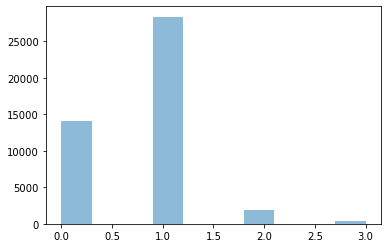

In [1122]:
## Lets check the distribution by using Histogram before imputation of NAN values:

plt.hist(df1["multiple_deliveries"], alpha=0.5, label='Dataset 1')


plt.show()

(array([14074.,     0.,     0., 28359.,     0.,     0.,  1956.,     0.,
            0.,   354.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

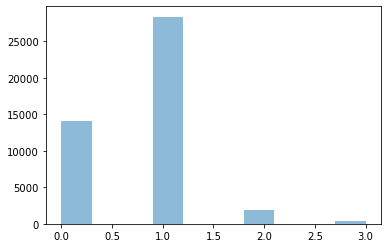

In [1123]:
## After imputation of NAN values

plt.hist(df1["multiple_deliveries"], alpha=0.5, label='Dataset 1')

In [1124]:
df1['multiple_deliveries'].value_counts()

1.0    28359
0.0    14074
2.0     1956
3.0      354
Name: multiple_deliveries, dtype: int64

In [1125]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)"
Delivery_person_Age,1.000000,-0.116696,0.005889,0.000161,-0.000456,0.112400,0.295711,-0.002707,-0.006102,-0.000272
Delivery_person_Ratings,-0.116696,1.000000,-0.002134,-0.068621,0.048319,-0.123901,-0.360602,-0.104138,-0.064660,0.047368
Weather_conditions,0.005889,-0.002134,1.000000,0.004402,-0.006700,-0.071177,-0.191848,-0.005811,0.000592,-0.002272
Road_traffic_density,0.000161,-0.068621,0.004402,1.000000,0.009940,0.158550,0.418819,0.202223,0.347841,-0.361392
Vehicle_condition,-0.000456,0.048319,-0.006700,0.009940,1.000000,-0.100150,-0.243058,0.008499,0.009649,-0.007452
multiple_deliveries,0.112400,-0.123901,-0.071177,0.158550,-0.100150,1.000000,0.378344,0.115554,0.079236,-0.092945
Time_taken (min),0.295711,-0.360602,-0.191848,0.418819,-0.243058,0.378344,1.000000,0.307049,0.213687,-0.254947
distance_in_km,-0.002707,-0.104138,-0.005811,0.202223,0.008499,0.115554,0.307049,1.000000,0.505097,-0.569701
"time_category_evening(18, 24)",-0.006102,-0.064660,0.000592,0.347841,0.009649,0.079236,0.213687,0.505097,1.000000,-0.578380
"time_category_morning(6, 12)",-0.000272,0.047368,-0.002272,-0.361392,-0.007452,-0.092945,-0.254947,-0.569701,-0.578380,1.000000


In [1126]:
df1.isnull().sum()

Delivery_person_Age                 0
Delivery_person_Ratings          1375
Weather_conditions                  0
Road_traffic_density                0
Vehicle_condition                   0
Type_of_order                       0
Type_of_vehicle                     0
multiple_deliveries                 0
Festival                            0
City                                0
Time_taken (min)                    0
distance_in_km                      0
time_category                       0
time_category_evening(18, 24)       0
time_category_morning(6, 12)        0
dtype: int64

In [1127]:
df1["Delivery_person_Ratings"].value_counts()

4.7    7095
4.8    7088
4.9    7002
4.6    6914
5.0    3973
4.5    3273
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.7      22
2.6      22
2.5      20
2.9      19
2.8      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

### We donot see any high correlation between delivery rating and other features. So we can go with simpleimputer

In [1129]:
from sklearn.impute import SimpleImputer

simputer = SimpleImputer()

df1["Delivery_person_Ratings"] = simputer.fit_transform(df1[["Delivery_person_Ratings"]])

In [1130]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)"
0,29.0,4.634678,2.0,1.0,1.0,Drinks,scooter,1.0,No,Metropolitian,33.0,12.236724,"evening(18, 24)",1.0,0.0
3,29.0,4.634678,1.0,0.0,2.0,Snack,scooter,0.0,No,Metropolitian,19.0,4.596577,"evening(18, 24)",1.0,0.0
4,29.0,4.634678,3.0,1.0,0.0,Drinks,motorcycle,0.0,No,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0.0,0.0
5,29.0,4.634678,3.0,3.0,1.0,Snack,scooter,0.0,No,Metropolitian,24.0,9.730844,"evening(18, 24)",1.0,0.0
7,29.0,4.634678,2.0,1.0,1.0,Snack,scooter,1.0,No,Urban,19.0,7.761350,"evening(18, 24)",1.0,0.0


In [1131]:
## Lets round off the column Delivery person rating
df1["Delivery_person_Ratings"] = df1["Delivery_person_Ratings"].round(decimals=1)

In [1132]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)"
Delivery_person_Age,1.000000,-0.116230,0.005889,0.000161,-0.000456,0.112400,0.295711,-0.002707,-0.006102,-0.000272
Delivery_person_Ratings,-0.116230,1.000000,-0.002126,-0.067462,0.047547,-0.122258,-0.354547,-0.102503,-0.063596,0.046608
Weather_conditions,0.005889,-0.002126,1.000000,0.004402,-0.006700,-0.071177,-0.191848,-0.005811,0.000592,-0.002272
Road_traffic_density,0.000161,-0.067462,0.004402,1.000000,0.009940,0.158550,0.418819,0.202223,0.347841,-0.361392
Vehicle_condition,-0.000456,0.047547,-0.006700,0.009940,1.000000,-0.100150,-0.243058,0.008499,0.009649,-0.007452
multiple_deliveries,0.112400,-0.122258,-0.071177,0.158550,-0.100150,1.000000,0.378344,0.115554,0.079236,-0.092945
Time_taken (min),0.295711,-0.354547,-0.191848,0.418819,-0.243058,0.378344,1.000000,0.307049,0.213687,-0.254947
distance_in_km,-0.002707,-0.102503,-0.005811,0.202223,0.008499,0.115554,0.307049,1.000000,0.505097,-0.569701
"time_category_evening(18, 24)",-0.006102,-0.063596,0.000592,0.347841,0.009649,0.079236,0.213687,0.505097,1.000000,-0.578380
"time_category_morning(6, 12)",-0.000272,0.046608,-0.002272,-0.361392,-0.007452,-0.092945,-0.254947,-0.569701,-0.578380,1.000000


In [1133]:
df1.isnull().sum()

Delivery_person_Age              0
Delivery_person_Ratings          0
Weather_conditions               0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken (min)                 0
distance_in_km                   0
time_category                    0
time_category_evening(18, 24)    0
time_category_morning(6, 12)     0
dtype: int64

In [1134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44743 entries, 0 to 45545
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Delivery_person_Age            44743 non-null  float64
 1   Delivery_person_Ratings        44743 non-null  float64
 2   Weather_conditions             44743 non-null  float64
 3   Road_traffic_density           44743 non-null  float64
 4   Vehicle_condition              44743 non-null  float64
 5   Type_of_order                  44743 non-null  object 
 6   Type_of_vehicle                44743 non-null  object 
 7   multiple_deliveries            44743 non-null  float64
 8   Festival                       44743 non-null  object 
 9   City                           44743 non-null  object 
 10  Time_taken (min)               44743 non-null  float64
 11  distance_in_km                 44743 non-null  float64
 12  time_category                  44743 non-null 

## Festival column transformation:

In [1135]:
df1["Festival"].value_counts()

No     43865
Yes      878
Name: Festival, dtype: int64

In [1136]:
## lets convert yes and No to 1 and 0

df1["Festival"] = df1["Festival"].replace({"Yes" : 1 , "No" : 0})

In [1137]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)"
0,29.0,4.6,2.0,1.0,1.0,Drinks,scooter,1.0,0,Metropolitian,33.0,12.236724,"evening(18, 24)",1.0,0.0
3,29.0,4.6,1.0,0.0,2.0,Snack,scooter,0.0,0,Metropolitian,19.0,4.596577,"evening(18, 24)",1.0,0.0
4,29.0,4.6,3.0,1.0,0.0,Drinks,motorcycle,0.0,0,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0.0,0.0
5,29.0,4.6,3.0,3.0,1.0,Snack,scooter,0.0,0,Metropolitian,24.0,9.730844,"evening(18, 24)",1.0,0.0
7,29.0,4.6,2.0,1.0,1.0,Snack,scooter,1.0,0,Urban,19.0,7.761350,"evening(18, 24)",1.0,0.0


In [1138]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)"
Delivery_person_Age,1.000000,-0.116230,0.005889,0.000161,-0.000456,0.112400,0.057966,0.295711,-0.002707,-0.006102,-0.000272
Delivery_person_Ratings,-0.116230,1.000000,-0.002126,-0.067462,0.047547,-0.122258,-0.061904,-0.354547,-0.102503,-0.063596,0.046608
Weather_conditions,0.005889,-0.002126,1.000000,0.004402,-0.006700,-0.071177,-0.048124,-0.191848,-0.005811,0.000592,-0.002272
Road_traffic_density,0.000161,-0.067462,0.004402,1.000000,0.009940,0.158550,0.121347,0.418819,0.202223,0.347841,-0.361392
Vehicle_condition,-0.000456,0.047547,-0.006700,0.009940,1.000000,-0.100150,-0.083904,-0.243058,0.008499,0.009649,-0.007452
multiple_deliveries,0.112400,-0.122258,-0.071177,0.158550,-0.100150,1.000000,0.139909,0.378344,0.115554,0.079236,-0.092945
Festival,0.057966,-0.061904,-0.048124,0.121347,-0.083904,0.139909,1.000000,0.289510,0.085591,0.069433,-0.053758
Time_taken (min),0.295711,-0.354547,-0.191848,0.418819,-0.243058,0.378344,0.289510,1.000000,0.307049,0.213687,-0.254947
distance_in_km,-0.002707,-0.102503,-0.005811,0.202223,0.008499,0.115554,0.085591,0.307049,1.000000,0.505097,-0.569701
"time_category_evening(18, 24)",-0.006102,-0.063596,0.000592,0.347841,0.009649,0.079236,0.069433,0.213687,0.505097,1.000000,-0.578380


## Type_of_order Transofrmation: 

In [1139]:
df1["Type_of_order"].value_counts()

Snack     11318
Meal      11236
Drinks    11121
Buffet    11068
Name: Type_of_order, dtype: int64

## We will check if there is any relation with time taken by doing one hot encoding for the type of order

In [1140]:
dfx = df1[["Type_of_order","Time_taken (min)"]]

In [1141]:
ohe3 = pd.get_dummies(dfx["Type_of_order"], prefix = "Type_of_order")

In [1142]:
dfx = pd.concat([dfx,ohe3],axis =1)

In [1143]:
dfx.corr()

,Time_taken (min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
Time_taken (min),1.000000,-0.000264,-0.005363,0.007472,-0.001861
Type_of_order_Buffet,-0.000264,1.000000,-0.329717,-0.331985,-0.333603
Type_of_order_Drinks,-0.005363,-0.329717,1.000000,-0.333041,-0.334664
Type_of_order_Meal,0.007472,-0.331985,-0.333041,1.000000,-0.336967
Type_of_order_Snack,-0.001861,-0.333603,-0.334664,-0.336967,1.000000


## We donot see any kind of correlation with the type of order and time taken

In [246]:
df1 = df1.drop(columns="Type_of_order",axis = 1)

In [247]:
df1

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,29.0,4.6,2.0,1.0,1.0,scooter,1.0,0,Metropolitian,33.0,12.236724
3,29.0,4.6,1.0,0.0,2.0,scooter,0.0,0,Metropolitian,19.0,4.596577
4,29.0,4.6,3.0,1.0,0.0,motorcycle,0.0,0,Metropolitian,43.0,10.427236
5,29.0,4.6,3.0,3.0,1.0,scooter,0.0,0,Metropolitian,24.0,9.730844
7,29.0,4.6,2.0,1.0,1.0,scooter,1.0,0,Urban,19.0,7.761350
...,...,...,...,...,...,...,...,...,...,...,...
45541,20.0,4.8,4.0,1.0,2.0,electric_scooter,1.0,0,Urban,25.0,6.080949
45542,20.0,4.5,1.0,2.0,2.0,electric_scooter,0.0,0,Metropolitian,21.0,3.116141
45543,20.0,4.8,2.0,1.0,2.0,scooter,1.0,0,Metropolitian,19.0,4.657347
45544,20.0,4.9,3.0,3.0,2.0,motorcycle,1.0,0,Urban,18.0,4.560738


## Type of vehicle column Transformation:

In [1144]:
df1["Type_of_vehicle"].value_counts()

motorcycle          26172
scooter             14975
electric_scooter     3596
Name: Type_of_vehicle, dtype: int64

In [1146]:
dfx1 = df1[["Type_of_vehicle","Time_taken (min)"]]

In [1147]:
dfx1["Type_of_vehicle"] = dfx1["Type_of_vehicle"].map({"motorcycle": 3, "scooter" : 2, "electric_scooter": 1})

C:\Users\deepa\AppData\Local\Temp/ipykernel_18560/226604479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx1["Type_of_vehicle"] = dfx1["Type_of_vehicle"].map({"motorcycle": 3, "scooter" : 2, "electric_scooter": 1})


In [1148]:
dfx1.corr()

,Type_of_vehicle,Time_taken (min)
Type_of_vehicle,1.000000,0.153413
Time_taken (min),0.153413,1.000000


In [1149]:
## There is a realtion between time taken and type of vehicle

df1["Type_of_vehicle"] = df1["Type_of_vehicle"].map({"motorcycle": 3, "scooter" : 2, "electric_scooter": 1})

In [1150]:
df1

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km,time_category,"time_category_evening(18, 24)","time_category_morning(6, 12)"
0,29.0,4.6,2.0,1.0,1.0,Drinks,2,1.0,0,Metropolitian,33.0,12.236724,"evening(18, 24)",1.0,0.0
3,29.0,4.6,1.0,0.0,2.0,Snack,2,0.0,0,Metropolitian,19.0,4.596577,"evening(18, 24)",1.0,0.0
4,29.0,4.6,3.0,1.0,0.0,Drinks,3,0.0,0,Metropolitian,43.0,10.427236,"afternoon(12, 18)",0.0,0.0
5,29.0,4.6,3.0,3.0,1.0,Snack,2,0.0,0,Metropolitian,24.0,9.730844,"evening(18, 24)",1.0,0.0
7,29.0,4.6,2.0,1.0,1.0,Snack,2,1.0,0,Urban,19.0,7.761350,"evening(18, 24)",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45541,20.0,4.8,4.0,1.0,2.0,Drinks,1,1.0,0,Urban,25.0,6.080949,"afternoon(12, 18)",0.0,0.0
45542,20.0,4.5,1.0,2.0,2.0,Snack,1,0.0,0,Metropolitian,21.0,3.116141,"morning(6, 12)",0.0,1.0
45543,20.0,4.8,2.0,1.0,2.0,Drinks,2,1.0,0,Metropolitian,19.0,4.657347,"evening(18, 24)",1.0,0.0
45544,20.0,4.9,3.0,3.0,2.0,Drinks,3,1.0,0,Urban,18.0,4.560738,"evening(18, 24)",1.0,0.0


## City column transformation

In [254]:
df1["City"].value_counts()

Metropolitian    34569
Urban            10011
Semi-Urban         163
Name: City, dtype: int64

In [1151]:
## Lets perform one hot encoding for the City column

ohe = pd.get_dummies(df1["City"], prefix = "City")

In [1152]:
df1 = pd.concat([df1,ohe],axis = 1)

In [1153]:
df1 = df1.drop(columns="City",axis =1)

In [1154]:
df1.shape

(44743, 17)

In [1155]:
df1.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,Time_taken (min),distance_in_km,"time_category_evening(18, 24)","time_category_morning(6, 12)",City_Metropolitian,City_Semi-Urban,City_Urban
Delivery_person_Age,1.000000,-0.116230,0.005889,0.000161,-0.000456,-0.001824,0.112400,0.057966,0.295711,-0.002707,-0.006102,-0.000272,0.056952,0.029464,-0.061557
Delivery_person_Ratings,-0.116230,1.000000,-0.002126,-0.067462,0.047547,-0.027607,-0.122258,-0.061904,-0.354547,-0.102503,-0.063596,0.046608,-0.055066,-0.026222,0.059190
Weather_conditions,0.005889,-0.002126,1.000000,0.004402,-0.006700,0.005278,-0.071177,-0.048124,-0.191848,-0.005811,0.000592,-0.002272,-0.031946,-0.007946,0.033285
Road_traffic_density,0.000161,-0.067462,0.004402,1.000000,0.009940,-0.004978,0.158550,0.121347,0.418819,0.202223,0.347841,-0.361392,0.063507,0.066727,-0.073555
Vehicle_condition,-0.000456,0.047547,-0.006700,0.009940,1.000000,-0.632021,-0.100150,-0.083904,-0.243058,0.008499,0.009649,-0.007452,-0.035915,-0.058528,0.044613
Type_of_vehicle,-0.001824,-0.027607,0.005278,-0.004978,-0.632021,1.000000,0.066088,0.053552,0.153413,-0.004575,-0.004827,0.004437,0.021125,0.037483,-0.026684
multiple_deliveries,0.112400,-0.122258,-0.071177,0.158550,-0.100150,0.066088,1.000000,0.139909,0.378344,0.115554,0.079236,-0.092945,0.059499,0.079120,-0.071321
Festival,0.057966,-0.061904,-0.048124,0.121347,-0.083904,0.053552,0.139909,1.000000,0.289510,0.085591,0.069433,-0.053758,0.018066,0.101103,-0.032835
Time_taken (min),0.295711,-0.354547,-0.191848,0.418819,-0.243058,0.153413,0.378344,0.289510,1.000000,0.307049,0.213687,-0.254947,0.163519,0.151262,-0.186410
distance_in_km,-0.002707,-0.102503,-0.005811,0.202223,0.008499,-0.004575,0.115554,0.085591,0.307049,1.000000,0.505097,-0.569701,0.052923,0.032547,-0.057951


In [1164]:
## Lets drop the categories which are not required:

df1 = df1.drop(columns=["Type_of_order","time_category"],axis =1)

In [1165]:

X = df1.drop(columns="Time_taken (min)")
y = df1["Time_taken (min)"]

In [1166]:
## lets split the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

X_train.shape,X_test.shape

((31320, 14), (13423, 14))

## Feature scaling using Stnadardscaler:

In [1167]:
## Lets perform scaling on the columns:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [1168]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1169]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [1170]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train)

LinearRegression()

In [1171]:
y_pred = lr.predict(X_test_scaled)

In [1172]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.5619840488206507

In [1173]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train_scaled,y_train)

y_pred = dtr.predict(X_test_scaled)

In [1174]:
r2_score(y_test,y_pred)

0.6549761230904154

In [1175]:
svr = SVR(kernel="linear")

In [1176]:
svr.fit(X_train_scaled,y_train)

y_pred = svr.predict(X_test_scaled)

In [1177]:
r2_score(y_test,y_pred)

0.5608781149064146

In [ ]:
from sklearn.model_selection import GridSearchCV

svr = SVR()

# Defining the range of hyperparameters to search over
param_grid = {
    'C': [10,50,100,200]
    
}

# Searching over the hyperparameter space using GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Printing the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [1182]:
svr = SVR(kernel="rbf", gamma = "auto", C = 200 )

svr.fit(X_train_scaled,y_train)

y_pred = svr.predict(X_test_scaled)

In [1183]:
r2_score(y_test,y_pred)

0.6995260217203708